# Research Paper Classification System


In [32]:
#Import statements for all the classifiers
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
from sklearn.metrics import silhouette_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
# Data Preprocessing

def preprocess_text(text):
    # Check if text is NaN, and if so, return an empty string
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()

        # Remove punctuation
        translator = str.maketrans('', '', string.punctuation)
        text = text.translate(translator)

        # Tokenize the text
        words = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]

        # Join the words back into a single string
        text = ' '.join(words)
        print(text)
    return text

### TF-IDF and LDA

In [36]:
 nltk.download('punkt')
 nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load dataset
df = pd.read_csv('sample_data/Dataset-2.csv')
df = df.dropna()

# Apply preprocessing to abstract data
df['abstract_preprocessed'] = df['abstract'].apply(preprocess_text)
df['abstract_preprocessed'].dropna

In [38]:
from gensim import corpora, models

# Function to tokenize text
def tokenize_text(text):
    # Use NLTK's word_tokenize function to split text into words
    return word_tokenize(text)

# Apply the tokenization function to the 'abstract' column
df['tokenized_texts'] = df['abstract_preprocessed'].apply(tokenize_text)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df['tokenized_texts'])
corpus = [dictionary.doc2bow(text) for text in df['tokenized_texts']]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=15, id2word=dictionary, passes=15)

In [39]:
labels = []
for doc in corpus:
    topics = lda_model.get_document_topics(doc)
    dominant_topic = max(topics, key=lambda x: x[1])
    labels.append(dominant_topic[0])

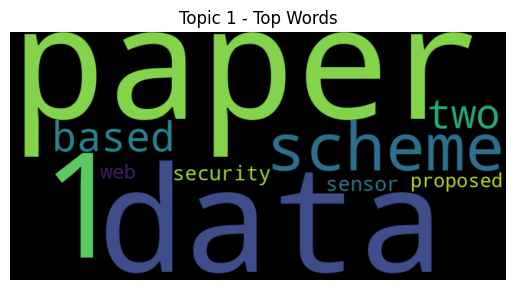

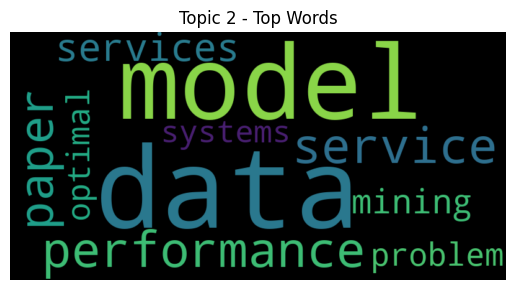

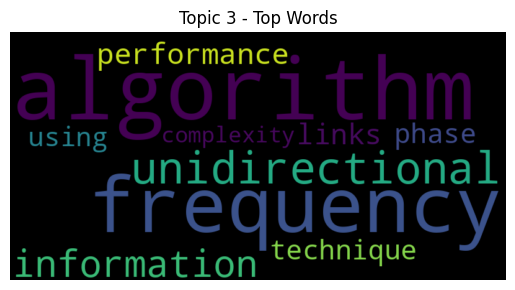

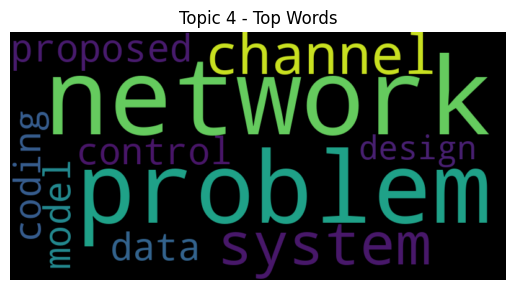

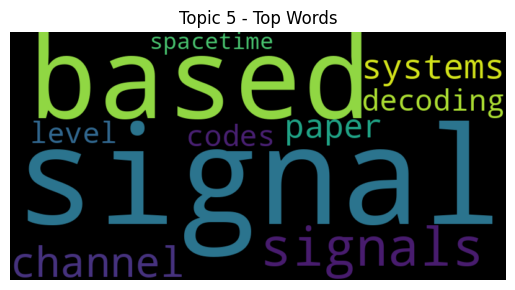

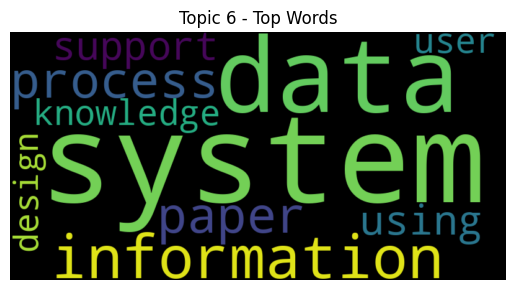

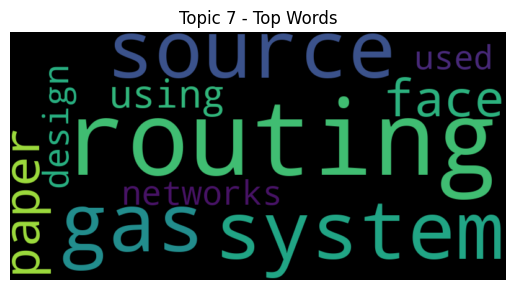

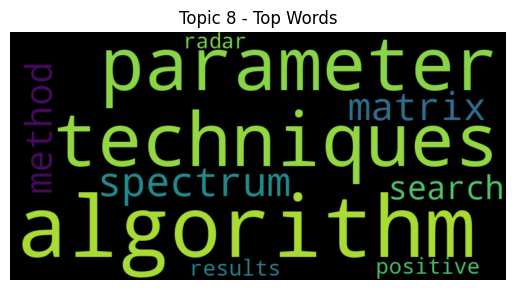

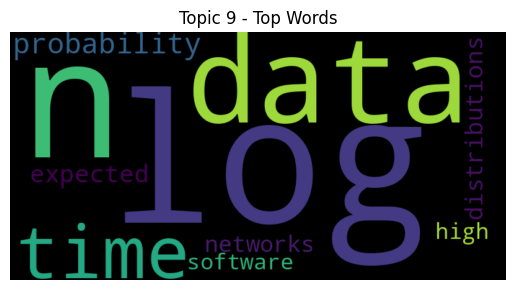

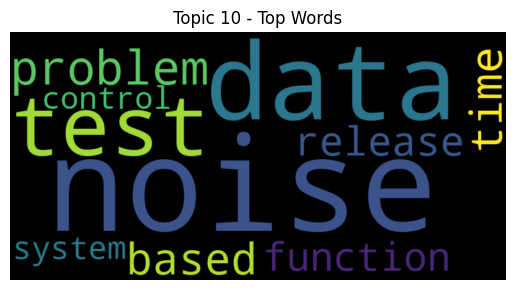

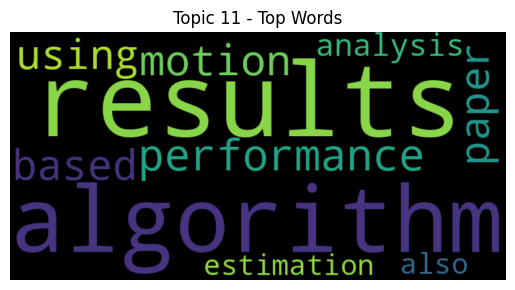

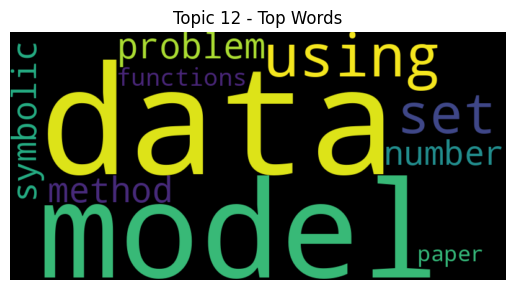

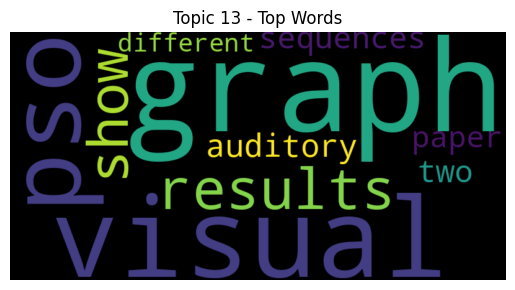

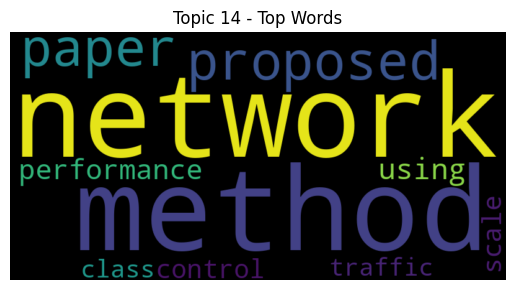

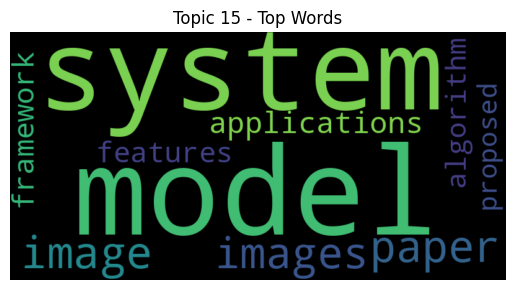

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming `lda_model` is your trained LDA model
topics = lda_model.show_topics(num_topics=20, num_words=10, formatted=False)

for topic_id, words in topics:
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(words))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Topic {topic_id + 1} - Top Words")
    plt.axis("off")
    plt.show()

### Multi-Label Classification

*Naive Bayes*

In [44]:
def NaiveBayersModel(data):
    total_accuracy=[]
    data = data.dropna()


    categorical_features=list(data.select_dtypes(include=['object']).columns)
    label_encoder=LabelEncoder()
    for col in categorical_features:
        data[col]= label_encoder.fit_transform(data[col])

    X_Data=data.iloc[:,:3]
    Y_Data=data.iloc[:,3:]
    X_train,X_test,Y_train,Y_test=train_test_split(X_Data,Y_Data,test_size=0.4,random_state=42)


    for i in range(Y_train.shape[1]):

    # Create a Gaussian Naive Bayes model
        naive_bayers_model=GaussianNB()
        naive_bayers_model.fit(X_train,Y_train.iloc[:,i])
        predict_y=naive_bayers_model.predict(X_test)
        accuracy=accuracy_score(predict_y,Y_test.iloc[:,i])
        total_accuracy.append(accuracy)
    print(f"Accuracy of the data for the Naive Bayers model is {np.mean(total_accuracy)*100}%")

#Model - Naive_bayers

data=pd.read_csv("sample_data/Dataset-4.csv")
NaiveBayersModel(data)

Accuracy of the data for the Naive Bayers model is 79.01617197123217%


*SVM*

In [45]:
#Model - SVM
def SVM_model(data):
    total_accuracy=[]
    data = data.dropna()


    categorical_features=list(data.select_dtypes(include=['object']).columns)
    label_encoder=LabelEncoder()
    for col in categorical_features:
        data[col]= label_encoder.fit_transform(data[col])

    X_Data=data.iloc[:,:3]
    Y_Data=data.iloc[:,3:]
    X_train,X_test,Y_train,Y_test=train_test_split(X_Data,Y_Data,test_size=0.4,random_state=42)

    for i in range(Y_train.shape[1]):

        svm_model=svm.SVC(kernel="poly",degree=2)
        svm_model.fit(X_train,Y_train.iloc[:,i])
        predict_y=svm_model.predict(X_test)
        accuracy=accuracy_score(predict_y,Y_test.iloc[:,i])
        total_accuracy.append(accuracy)
    print(f"Accuracy of the data for the SVM is {np.mean(total_accuracy)*100}%")

#Model - SVM

data=pd.read_csv("sample_data/Dataset-4.csv")
SVM_model(data)

Accuracy of the data for the SVM is 79.02809234314776%


## Supervised Learning: Random Forest, AdaBoost

*Random Forest*

In [46]:
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('sample_data/Dataset-3.csv')
df = df.dropna()

# Features and labels
X = df[['TITLE', 'ABSTRACT']]
y = df['Labels']

# Convert labels to numeric format if they are in string format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess text features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['TITLE'] + ' ' + X_train['ABSTRACT'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['TITLE'] + ' ' + X_test['ABSTRACT'])

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2%}\n")
print(f"Classification Report:\n\n{classification_rep}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 73.12%

Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.93      0.76       451
           1       0.79      0.74      0.76       229
           2       0.92      0.79      0.85       277
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        94

    accuracy                           0.73      1101
   macro avg       0.39      0.41      0.39      1101
weighted avg       0.66      0.73      0.68      1101

Confusion Matrix:
[[418  25   8   0   0   0]
 [ 57 169   3   0   0   0]
 [ 45  14 218   0   0   0]
 [ 23   1   5   0   0   0]
 [ 18   3   0   0   0   0]
 [ 88   2   4   0   0   0]]


*AdaBoost*

In [49]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('sample_data/Dataset-3.csv', header=None)

# Drop na values
df = df.dropna()
print(df)

         0                                                  1  \
0       ID                                              TITLE   
1        1        Reconstructing Subject-Specific Effect Maps   
2        2                 Rotation Invariance Neural Network   
3        3  Spherical polyharmonics and Poisson kernels fo...   
4        4  A finite element approximation for the stochas...   
...    ...                                                ...   
5499  5499  Bayesian Deep Convolutional Encoder-Decoder Ne...   
5500  5500  A symmetric monoidal and equivariant Segal inf...   
5501  5501  Compact Convolutional Neural Networks for Clas...   
5502  5502  Long-range proximity effect in Nb-based hetero...   
5503  5503               ASK/PSK-correspondence and the r-map   

                                                      2                 3  
0                                              ABSTRACT            Labels  
1     Predictive models allow subject-specific infer...  Computer S

In [50]:
# Identify categorical columns
categorical_columns = [0,1,2,3]

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Extract features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

In [51]:
# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with a decision tree base estimator
base_estimator = DecisionTreeClassifier(max_depth=10)
ada_classifier = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

In [52]:
# Define the base classifier (e.g., DecisionTreeClassifier)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Define the AdaBoostClassifier
ada_classifier = AdaBoostClassifier(base_classifier)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform GridSearchCV
grid_search = GridSearchCV(ada_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the AdaBoostClassifier with the best parameters
best_ada_classifier = AdaBoostClassifier(base_classifier, **best_params)
best_ada_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1)

In [53]:
# Make predictions on the test set
y_pred = best_ada_classifier.predict(X_test)

# Calculate F1-score on the test set
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F-score on the test set: {f1:.2}')

F-score on the test set: 0.24


### Unsupervised Learning: Hierarchical Clustering, K-Means Clustering

*Hierarchical Clustering*

In [56]:
dataset1=pd.read_csv("sample_data/Dataset-1.csv")
dataset1=dataset1.sample(frac=0.5,random_state=42)

dataset2=pd.read_csv("sample_data/Dataset-2.csv")

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
def Hierarchial_Clustering(name,df,k):
    df=df['abstract']
    x=df.apply(preprocess_text)
    x=x.dropna()

    vectorizer = TfidfVectorizer(min_df=100)
    x_matrix= vectorizer.fit_transform(x)

    num_clusters = k
    agg_cluster = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward',compute_full_tree=True)
    clusters=agg_cluster.fit_predict(x_matrix.toarray())
    unique,count=np.unique(clusters,return_counts=True)
    print(unique,count)

    x_dense = x_matrix.toarray()
    print(x_dense.shape)

    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(x_dense)

    clustered_data = list(zip(x_pca[:, 0], x_pca[:, 1], clusters))

    # Create scatter plots for each cluster
    plt.figure(figsize=(9,7))
    for cluster_num in range(num_clusters):
        cluster_points = [point for point in clustered_data if point[2] == cluster_num]
        cluster_points = list(zip(*cluster_points))

        plt.scatter(cluster_points[0], cluster_points[1], label=f'Cluster {cluster_num}')



    #Dendrigram Plot
    linkage_matrix = linkage(x_dense, method='ward', metric='euclidean')
    clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

    plt.title(f'Scatter Plot of Hierarchical Clustering for {name }(PCA Reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

    # Calculate silhouette score
    silhouette_avg = silhouette_score(x_dense, clusters)

    print(f"Silhouette Score: {silhouette_avg}")
    # Plot the dendrogram
    dendrogram(linkage_matrix, labels=None)
    plt.title(f'Hierarchical Clustering Dendrogram for {name}')
    plt.xlabel('Data Point Index')
    plt.ylabel('Distance')
    plt.show()

    centroids = np.array([np.mean(x_dense[clusters == i], axis=0) for i in range(num_clusters)])

    # Calculate inertia (within-cluster sum of squares)
    inertia = sum(np.sum((x_dense[clusters == i] - centroids[i]) ** 2) for i in range(num_clusters))

    print(f"Inertia: {inertia}")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [4089  772  268 2321  614  966   84  125  119  124  384   71  152   63
   70   70   65  163   97  198]
(10815, 1444)


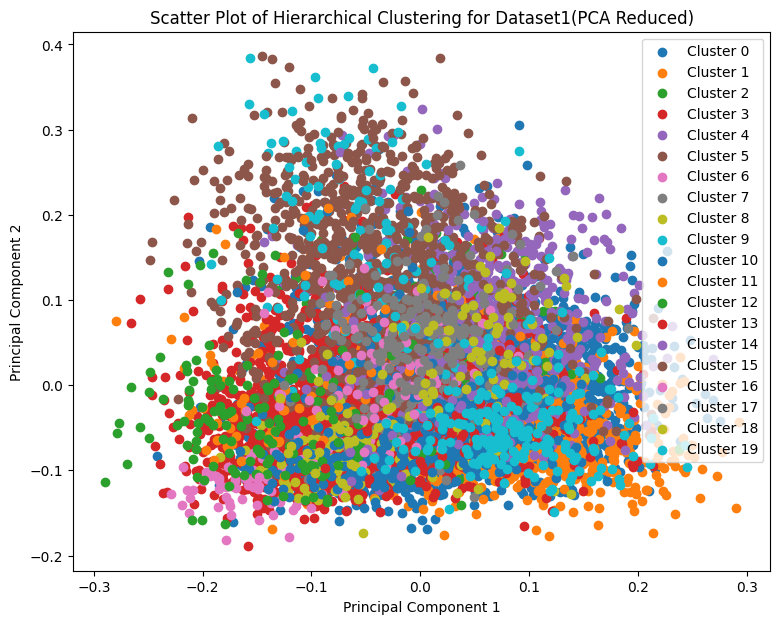

Silhouette Score: -0.0031573357158939854


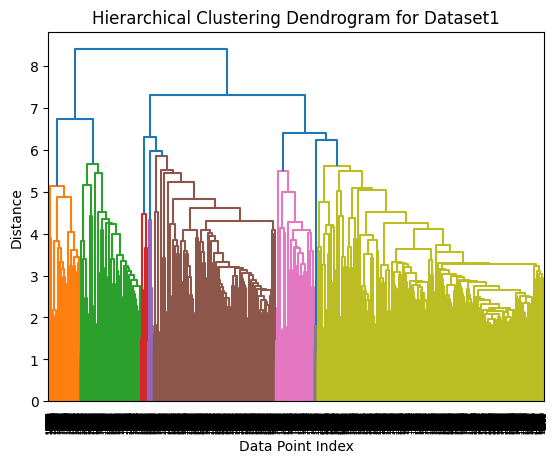

Inertia: 6153.068387912513


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [ ]:
#Hierarchial Clustering for the Dataset1

Hierarchial_Clustering("Dataset1",dataset1,20)

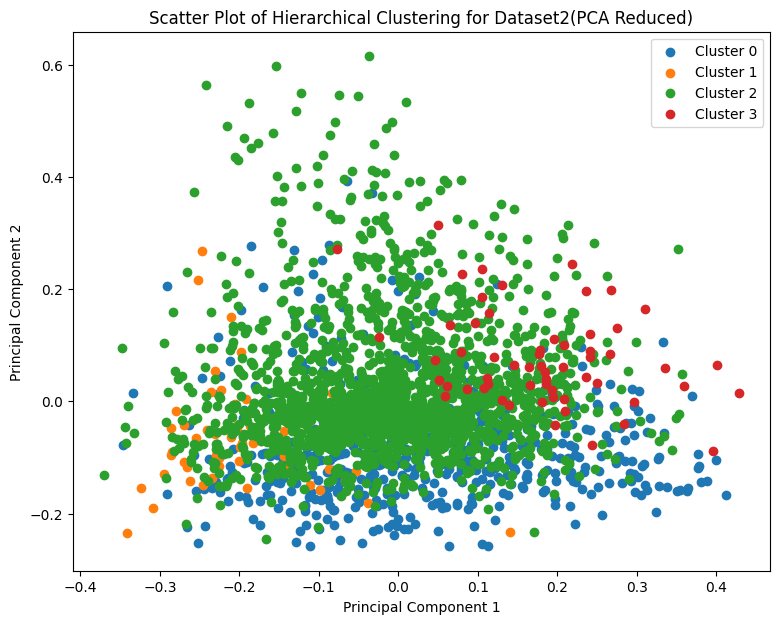

Silhouette Score: 0.004926575533128534


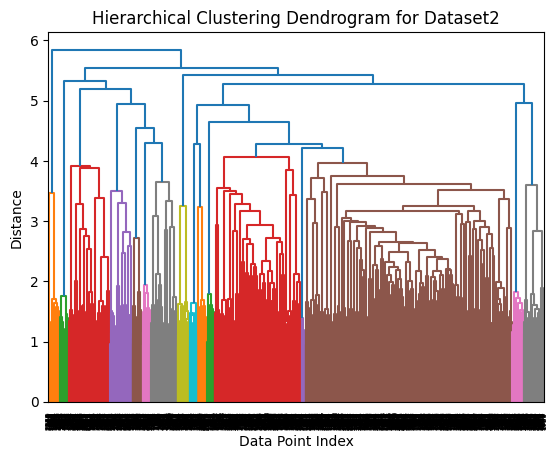

Inertia: 587.9181417720451


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [ ]:
#Hierarchial Clustering for the Dataset2

Hierarchial_Clustering("Dataset2",dataset2,4)

*K-Means Clustering*

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import pandas as pd

# Read data from CSV file into a pandas DataFrame
df = pd.read_csv('sample_data/Dataset-2.csv', na_values=['np.nan'])

# Display the first few rows of the DataFrame
print(df.head(5))

                                            abstract  \
0  This paper describes a case study of the devel...   
1  Safety properties are an important class of pr...   
2  Motivation: Cellular processes are not isolate...   
3  Complex systems can be represented as weighted...   
4  We investigate the implications of a unified s...   

                                              author  count  \
0  ['Alice E. Smith', 'David W. Coit', 'Yun-Chia ...     50   
1  ['Tuomas Launiainen', 'Keijo Heljanko', 'Tommi...     11   
2  ['Tianwei Yu', 'Wei Sun', 'Shinsheng Yuan', 'K...     16   
3  ['David Luper', 'Caner Kazanci', 'John R. Schr...      3   
4                 ['Steven Bergner', 'Mark S. Drew']     50   

                                                  id  \
0  ['0116b629-ed02-4b97-b751-25cf056ea874', '0fff...   
1  ['01b88a9b-26d7-4ee1-8624-96445043018f', '1ff6...   
2  ['2c2792c2-533c-4d67-ba88-3d64e0615215', '2dd9...   
3  ['014933ff-56b8-4634-b3fb-11f7cf14089f', '0e80...   
4  [

In [59]:
# Remove rows with NaN values in the abstract column
df = df.dropna(subset=['abstract'])

abstracts = df['abstract']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(abstracts)

# K-Means clustering
num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualize or analyze the clusters
print(df[['title', 'cluster']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                                  title  cluster
0     Neural Network Models to Anticipate Failures o...        4
1     Efficient Model Checking of PSL Safety Properties       28
2     Study of coordinative gene expression at the b...       29
3                 Flow Decomposition in Complex Systems       10
4     Spatiotemporal-chromatic structure of natural ...       17
...                                                 ...      ...
2485  Kiwi: A Multilingual Usage Consultation Tool b...       25
2486  On Computing Bounds on Average Backlogs and De...        6
2487  Monte Carlo query processing of uncertain mult...       10
2488  Position and Velocity Navigation Systems for U...       11
2489  A new class of universal Lyapunov functions fo...       11

[2407 rows x 2 columns]


In [60]:
# Get SSE (Inertia) from the trained K-means model
sse = kmeans.inertia_

print(f'Sum of Squared Errors (SSE): {sse}')

Sum of Squared Errors (SSE): 2285.0235896179975


In [63]:
# Prints all the clusters and number of samples in each cluster
array = np.array(df['cluster'])
uni,count=np.unique(array,return_counts=True)
print(uni,count)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] [101 106  46  63 418  46  93  56  59  28 130  91  74  50 123 119  80  40
  35  58  71  46  38  49  60  52 132  41  44  58]


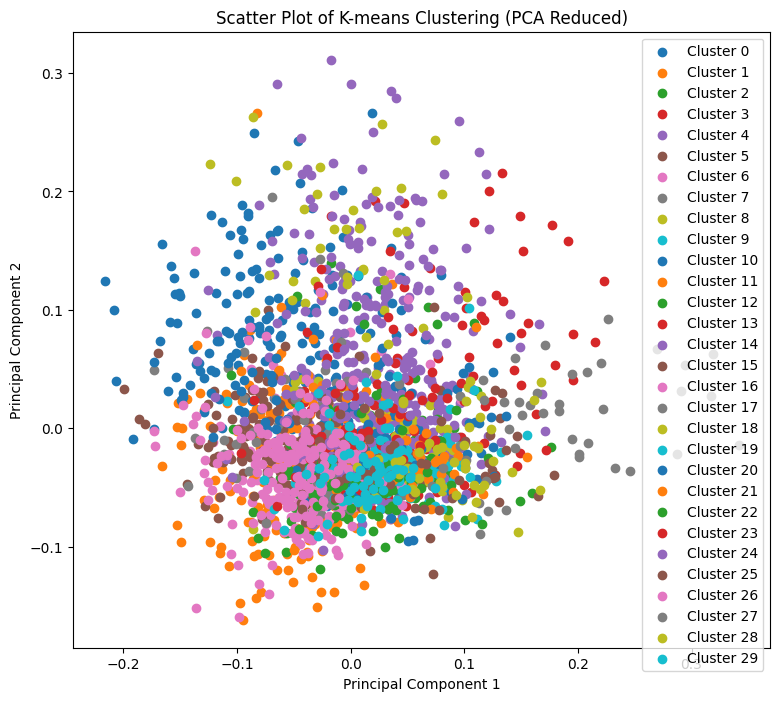

In [ ]:
X_dense=X.toarray()
kmeans_pca=PCA(n_components=2)
x_pca=kmeans_pca.fit_transform(X_dense)
#print(df['cluster'].shape)
k_means_clusters=list(zip(x_pca[:,0],x_pca[:,1],df['cluster']))

plt.figure(figsize=(9,8))
for cluster_num in range(num_clusters):

    cluster_points=[point for point in k_means_clusters if point[2]== cluster_num]
    cluster_points=list(zip(*cluster_points))
    plt.scatter(cluster_points[0], cluster_points[1], label=f'Cluster {cluster_num}')

plt.title(f'Scatter Plot of K-means Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()